# Comparism of deformation gradient and orientation tensors

This homework is focused on comparism of properties of deformation gradient and orientation tensor calculated from population of originally uniformly distributed vectors transformed by given deformation gradient. It shows whether it is possible to reconstruct property of defromation gradient from orientation distribution of passive linear markers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from apsg import *

`l` contains population of randomly distributed linear markers

In [2]:
l = linset.uniform_gss(n=500)

Here we define the ratios of principal stretches. In following code we will loop trough all combinations of `Rxy` and `Ryz` and plot dot on Flinn diagram representing the finite strain ellipsoid of given deformation gradient.

In [3]:
Rxy = np.linspace(1, 4, 10)
Ryz = np.linspace(1, 4, 10)

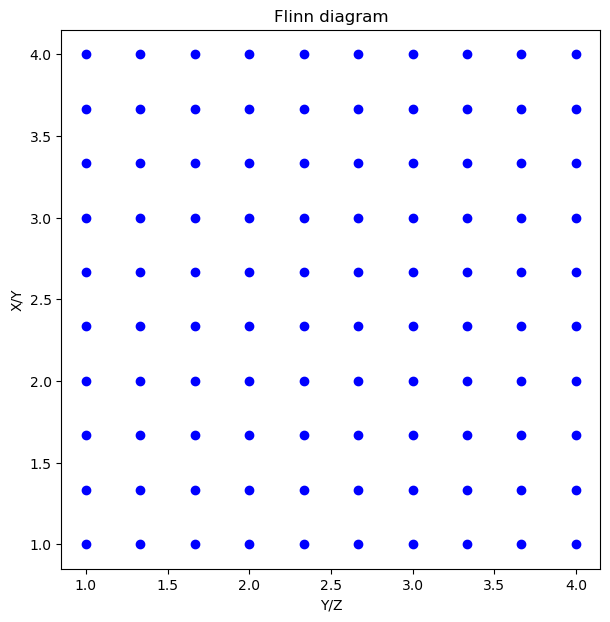

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
for rxy in Rxy:
    for ryz in Ryz:
        ax.plot(ryz, rxy, 'bo');

ax.axis('square')
ax.set_xlabel('Y/Z')
ax.set_ylabel('X/Y')
ax.set_title('Flinn diagram');

Write a code which plot blue dot connected by line with green squares representing ellipsoid of orientation tensor calculated from transformed lines `l` by deformation gradient defined by actual values of `rxy` and `ryz`.

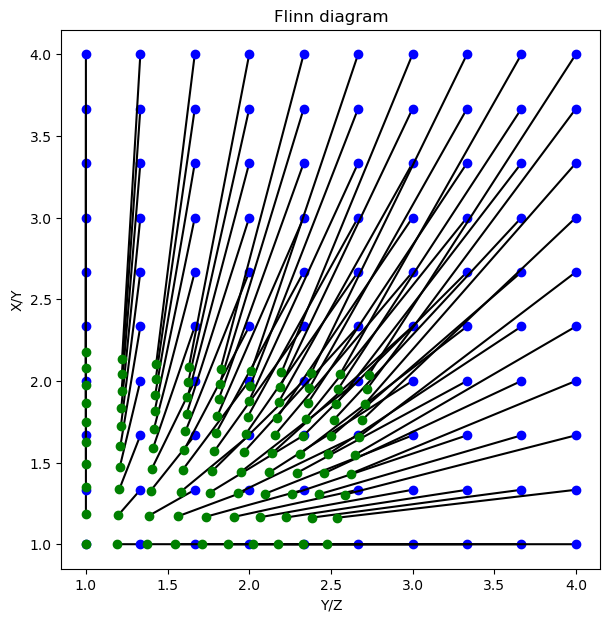

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
for rxy in Rxy:
    for ryz in Ryz:
        # Define deformation gradient F from rxy an ryz
        F = defgrad.from_ratios(rxy, ryz)
        # Apply deformation gradient to lines l and normalize them!
        ld = l.transform(F)
        ldu = ld.normalized()
        # Calculate orientation tensor Q and its principal laxes rations qxy and qyz
        Q = ldu.ortensor()
        qxy = Q.Rxy
        qyz = Q.Ryz
        # Plot two dots connected by line
        ax.plot([ryz, qyz], [rxy, qxy], 'k')  # plot connecting line
        ax.plot(ryz, rxy, 'bo') # plot deformation gradient
        ax.plot(qyz, qxy, 'go') # plot orientation tensor

ax.axis('square')
ax.set_xlabel('Y/Z')
ax.set_ylabel('X/Y')
ax.set_title('Flinn diagram');